### Chapter 2: Regression with XGBoost

After a brief review of supervised regression, you'll apply XGBoost to the regression task of predicting house prices in Ames, Iowa. You'll learn about the two kinds of base learners that XGboost can use as its weak learners, and review how to evaluate the quality of your regression models.

- 2.1 Regression review
    - Which of these is a regression problem?  
    <br/>
    
- 2.2 Objective (loss) functions and base learners
    - Decision trees as base learners
    - Linear base learners
    - Evaluating model quality  
    <br/>

- 2.3 Regularization and base learners in XGBoost
    - Using regularization in XGBoost
    - Visualizing individual XGBoost trees
    - Visualizing feature importances: What features are most important in my dataset  
    <br/>

#### 2.1 Regression Overview
 Watch the video and answer the question.

#### 2.2 Objective (loss) functions and base learners


In [58]:
import xgboost as xgb
import warnings   
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

pd.set_option('display.expand_frame_repr', False)

from sklearn.model_selection import train_test_split

boston_data = pd.read_csv('datasets/ames_housing_trimmed_processed.csv')
print(boston_data.head())
print(boston_data.info())

X, y = boston_data.iloc[:, :-1], boston_data.iloc[:, -1]
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

xg_reg = xgb.XGBRegressor(objective='reg:linear', n_estimators=10, seed=123)
xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)
# print(preds)

# rmse = np.sqrt(np.mean((preds - y_test) ** 2))
rmse = np.sqrt(mean_squared_error(y_test, preds)) 

print("RMSE: %f" % (rmse))

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  Remodeled  GrLivArea  BsmtFullBath  BsmtHalfBath  ...  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  PavedDrive_P  PavedDrive_Y  SalePrice
0          60         65.0     8450            7            5       2003          0       1710             1             0  ...                  0                  0                  0                  0                  1                  0                0             0             1     208500
1          20         80.0     9600            6            8       1976          0       1262             0             1  ...                  0                  1                  0                  0                  0                  0                0             0             1     181500
2          60         68.0    11250            7            5       2001          1       1786            

In [23]:
# Using Dmatrix
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

# params = {"booster": "gblinear", "objective": "reg:linear"}
params = {"booster": "gblinear", "objective": "reg:squarederror"}

xg_reg = xgb.train(params=params, dtrain=DM_train, num_boost_round=10)

preds = xg_reg.predict(DM_test)
# print(preds)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 40197.172898


C:\Users\nguyenngochai\.conda\envs\my_conda_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


- 2.2.1 Decision trees as base learners

    - Split df into training and testing sets, holding out 20% for testing. Use a random_state of 123.
    - Instantiate the XGBRegressor as xg_reg, using a seed of 123. Specify an objective of "reg:linear" and use 10 trees. Note: You don't have to specify booster="gbtree" as this is the default.
    - Fit xg_reg to the training data and predict the labels of the test set. Save the predictions in a variable called preds.
Compute the rmse using np.sqrt() and the mean_squared_error() function from sklearn.metrics, which has been pre-imported.

In [24]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective= 'reg:linear', seed=123, n_estimators = 10)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[16:02:27] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 28106.463641


C:\Users\nguyenngochai\.conda\envs\my_conda_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


- 2.2.2 Linear base learners


In [25]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear","objective": "reg:linear"}
# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

[16:02:32] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 42360.721333


C:\Users\nguyenngochai\.conda\envs\my_conda_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


- 2.2.3 Evaluating model quality
It's now time to begin evaluating model quality.

Here, you will compare the RMSE and MAE of a cross-validated XGBoost model on the Ames housing data. As in previous exercises, all necessary modules have been pre-loaded and the data is available in the DataFrame df

- Instructions 1/2
    - Perform 4-fold cross-validation with 5 boosting rounds and "rmse" as the metric.
    - Extract and print the final boosting round RMSE.

In [26]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

[16:15:48] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:48] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:48] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:48] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.535156      429.451316   142980.433594    1193.791602
1    102832.542969      322.473304   104891.392578    1223.157623
2     75872.617188      266.469946    79478.939454    1601.341377
3     57245.650390      273.623926    62411.921875    2220.149857
4     44401.298828      316.423666    51348.28

C:\Users\nguyenngochai\.conda\envs\my_conda_env\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


- instructions 2/2
    - Now, adapt your code to compute the "mae" instead of the "rmse".

In [36]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="mae", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print("\n",(cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.480469     668.337982  127633.972657   2404.002681
1    89770.052735     456.957620   90122.501953   2107.912682
2    63580.790039     263.405712   64278.563477   1887.565119
3    45633.153321     151.884551   46819.166016   1459.819398
4    33587.093750      86.999137   35670.645508   1140.606558

 4    35670.645508
Name: test-mae-mean, dtype: float64


#### 2.3 Regularization and base learners in XGBoost


In [41]:
""" L1 regularization in XGBoost example """

import xgboost as xgb
import pandas as pd

boston_data = pd.read_csv('datasets/ames_housing_trimmed_processed.csv')
X,y = boston_data.iloc[:, :-1], boston_data.iloc[:, -1]

boston_dmatrix = xgb.DMatrix(data=X, label=y)

params = {"objective":"reg:squarederror", "max_depth":4}
l1_params = [1, 10, 100]
rmses_l1 = []

for reg in l1_params:
    params["alpha"] = reg
    cv_results = xgb.cv(dtrain=boston_dmatrix, params=params, nfold=4, num_boost_round=10, metrics="rmse", as_pandas=True, seed=123)

    rmses_l1.append(cv_results["test-rmse-mean"].tail(1).values[0])

print("Best RMSE as a function of l1")
print(pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["l1", "rmse"]))

Best RMSE as a function of l1
    l1          rmse
0    1  35572.515625
1   10  35571.972656
2  100  35572.369140



- 2.3.1 Using regularization in XGBoost

Having seen an example of l1 regularization in the video, you'll now vary the ```l2 regularization``` penalty - also known as "lambda",
and see its effect on overall model performance on the Ames housing dataset.

In [42]:
""" L2 regularization in XGBoost example """

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

[17:05:55] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:55] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:55] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:55] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:55] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:05:55] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Best rmse as a function of l2:
    l2          rmse
0    1  5227

- 2.3.2 Visualizing individual XGBoost trees
  
Now that you've used XGBoost to both build and evaluate regression as well as classification models, you should get a handle on how to visually explore your models. Here, you will visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset.  
<br/>

XGBoost has a ```plot_tree()``` function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the ```plot_tree()``` function along with the number of trees you want to plot using the num_trees argument.

[17:45:59] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


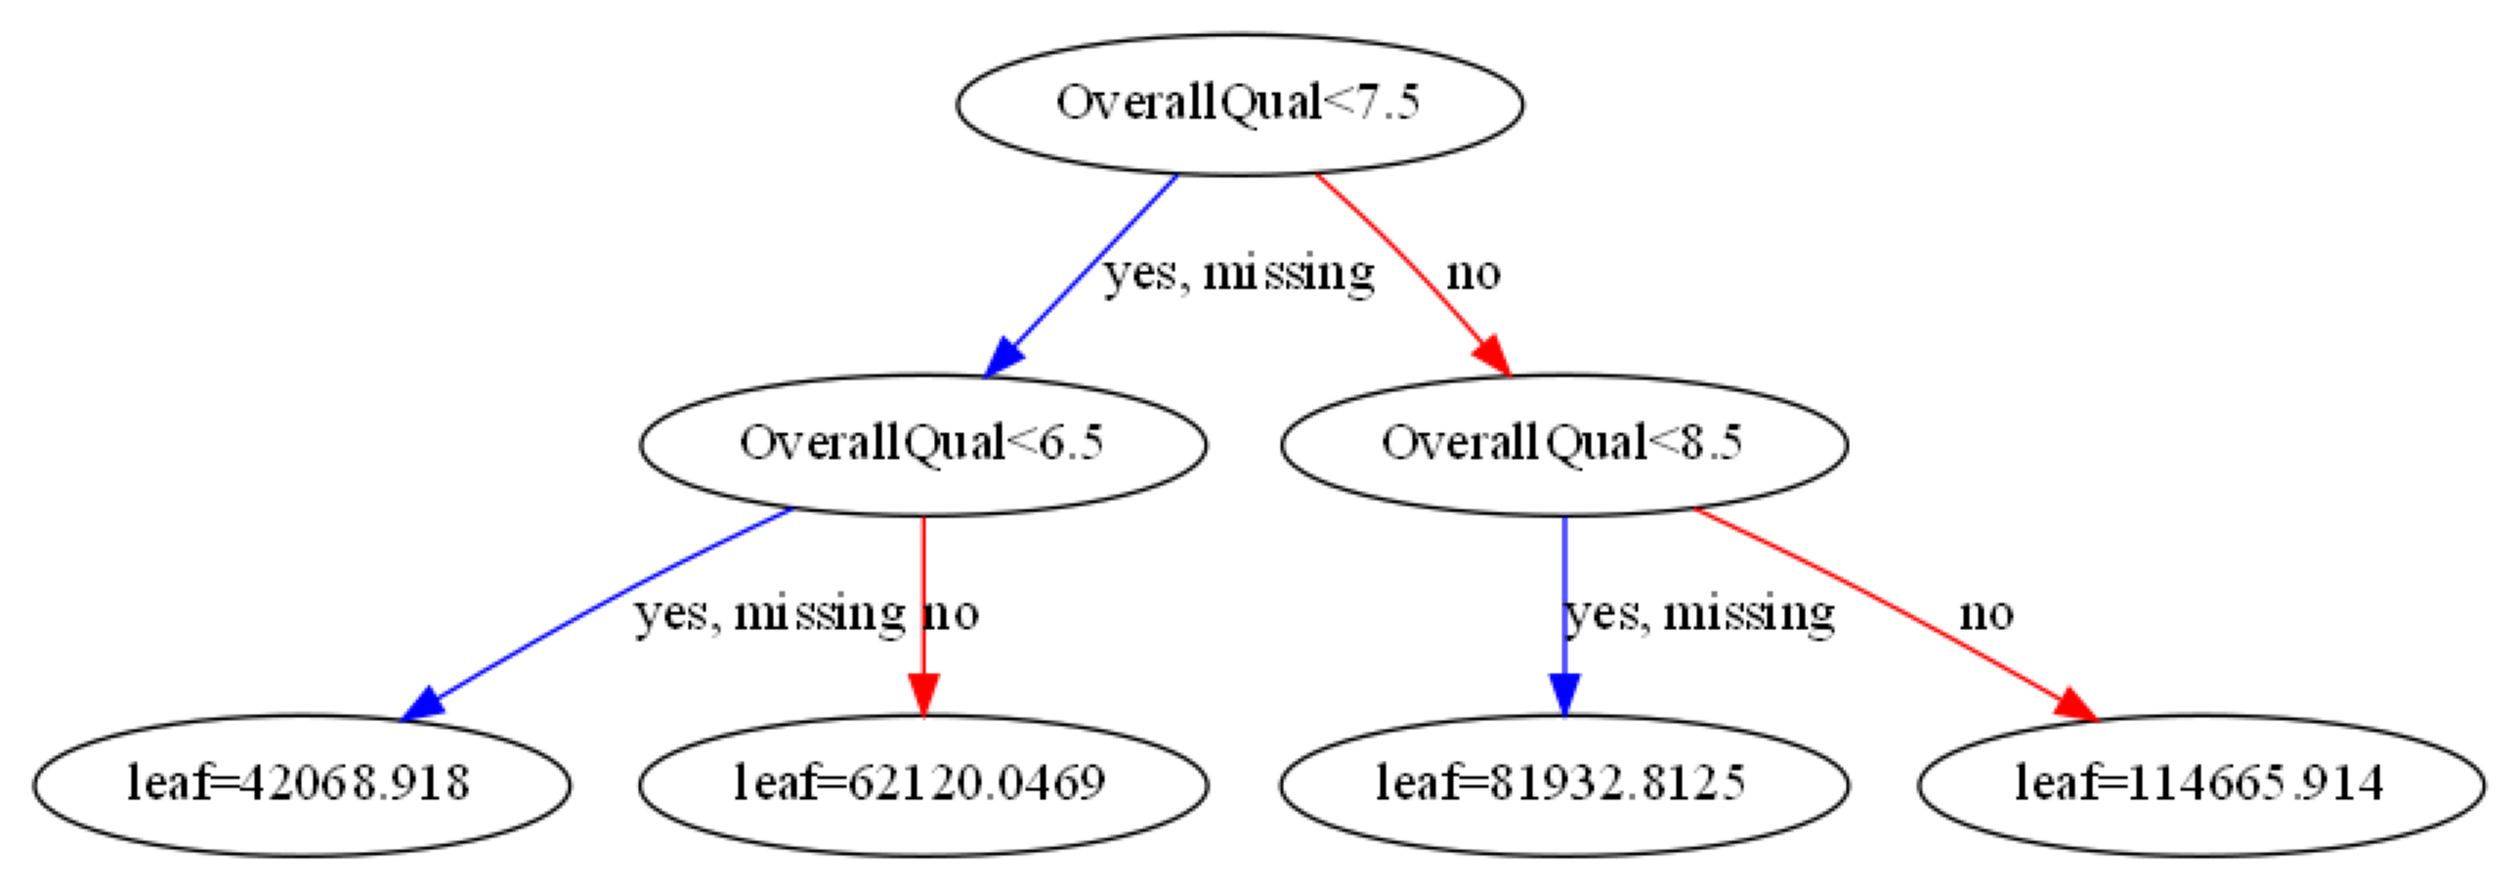

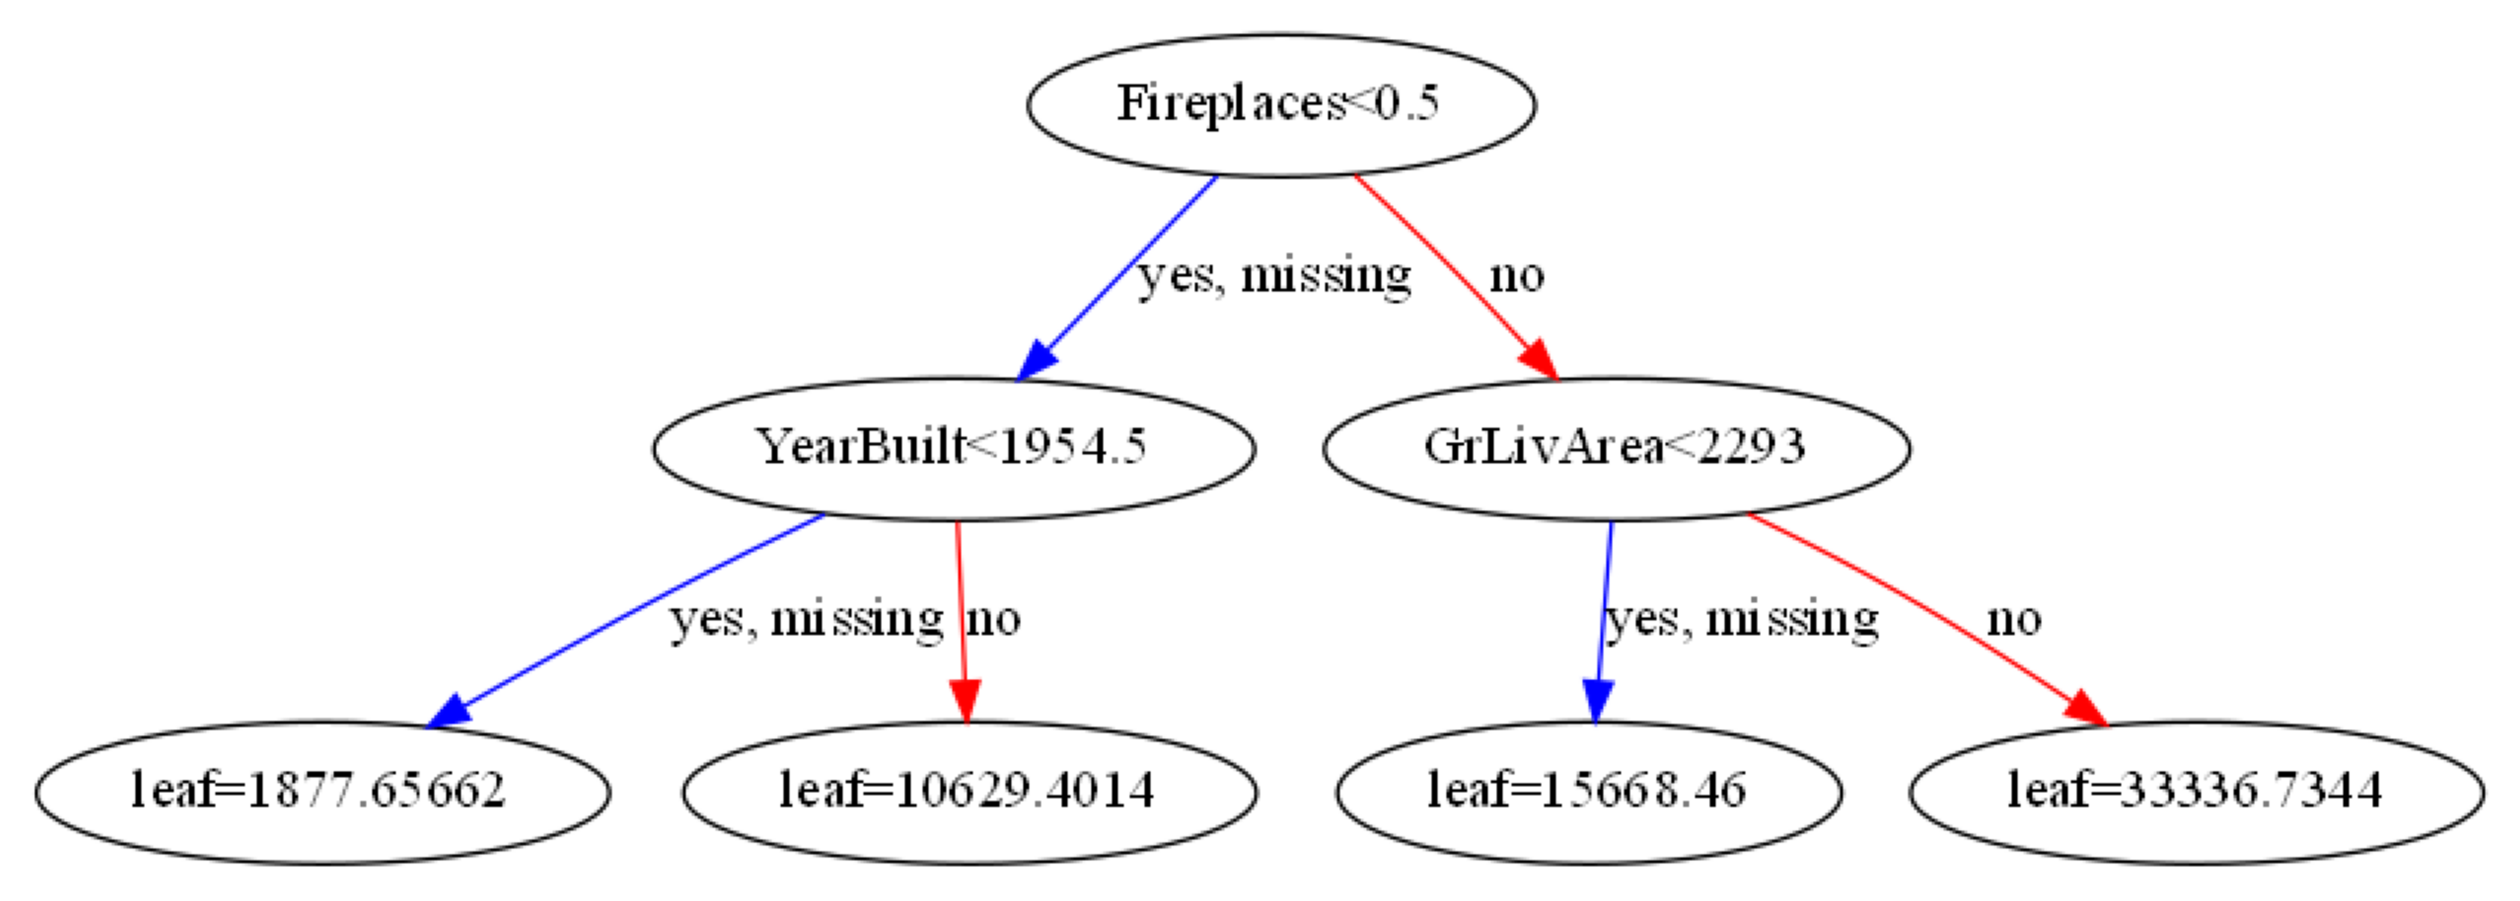

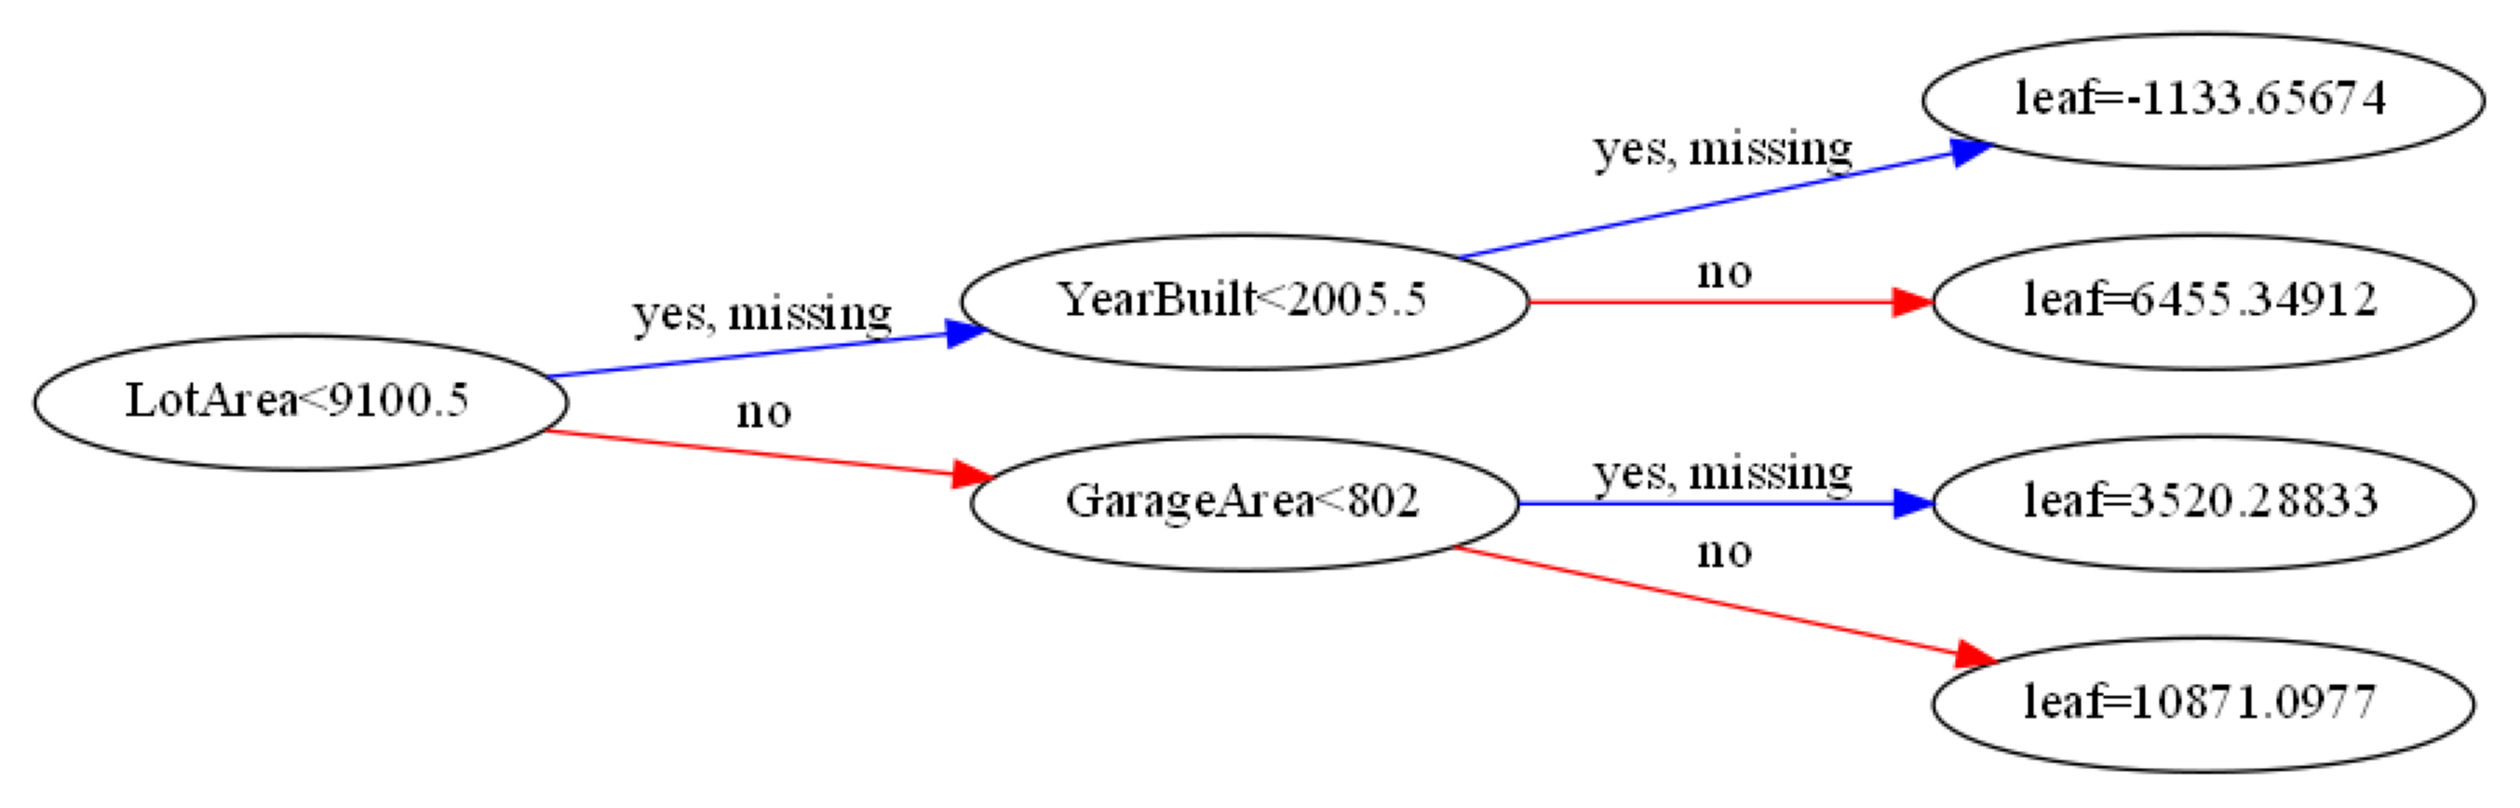

In [56]:
import matplotlib.pyplot as plt
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)
# set plt figure size
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.dpi'] = 200

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees = 0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees = 4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees = 9, rankdir="LR")
plt.show()

- 2.3.3 Visualizing feature importances: What features are most important in my dataset  

Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a ```plot_importance()``` function that allows you to do exactly this, and you'll get a chance to use it in this exercise!

[17:46:19] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


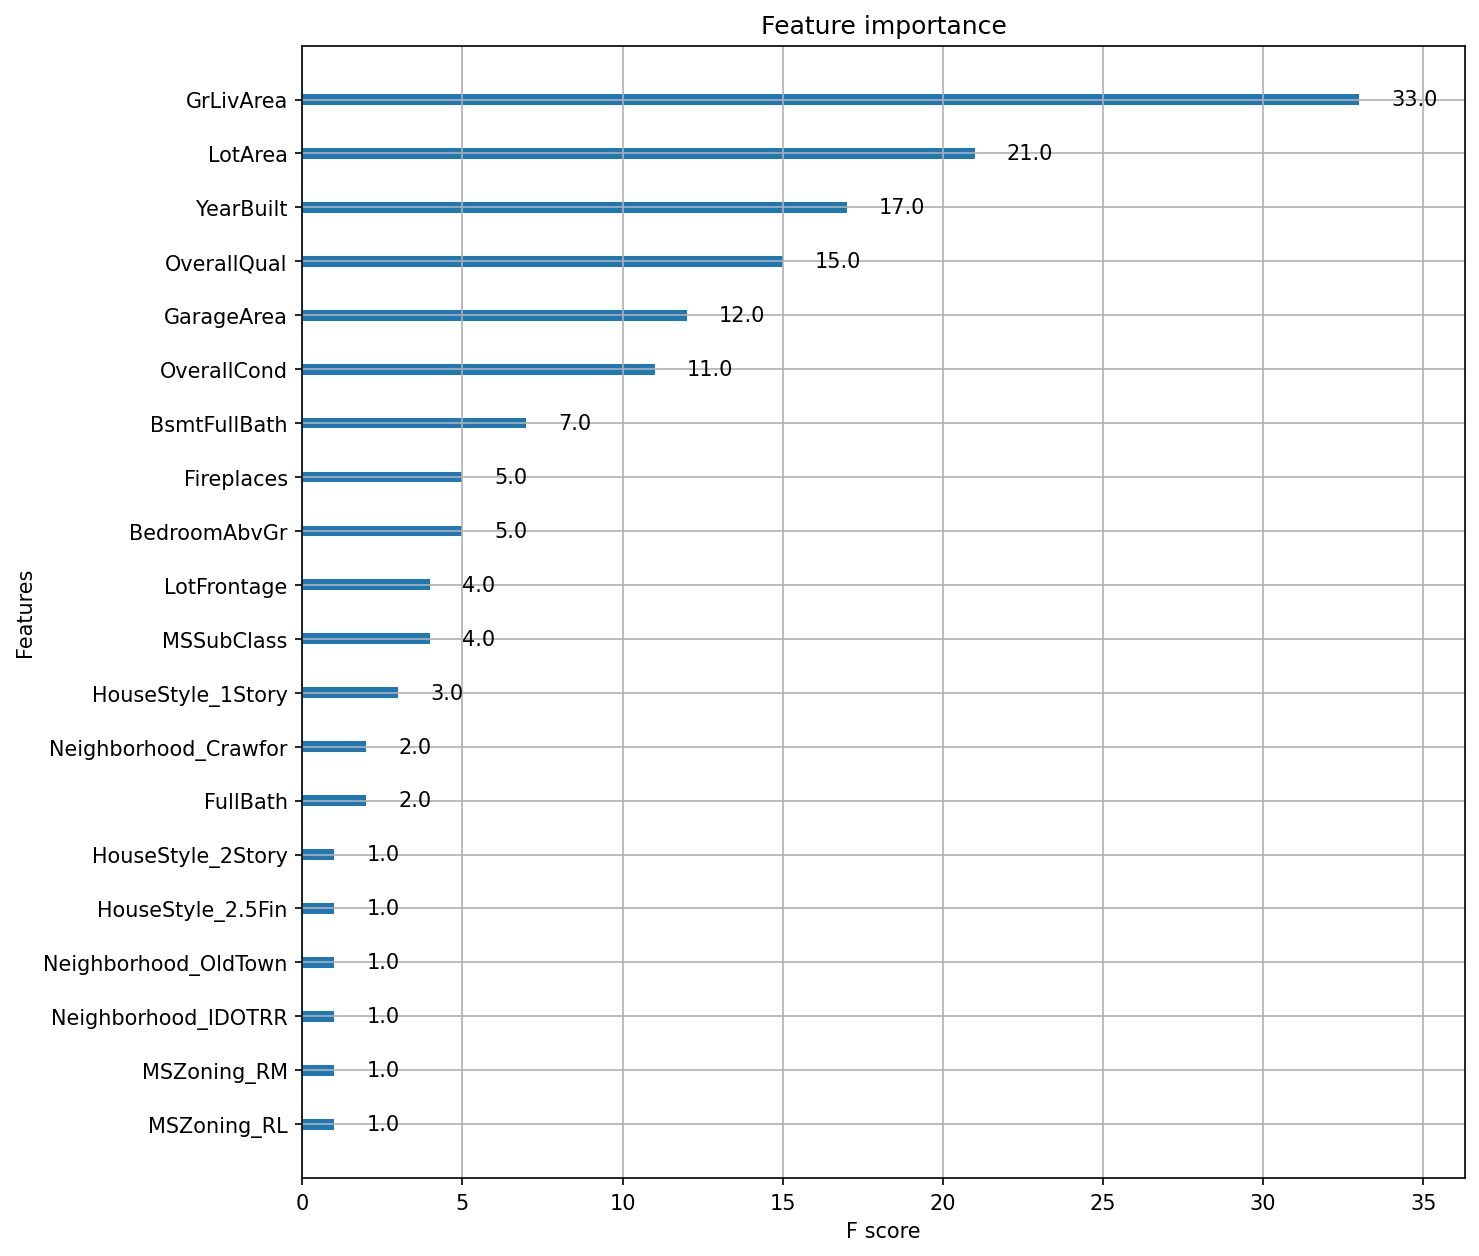

In [57]:
# set plt figure size and dpi
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 150

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data = X, label= y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round = 10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()